Real-world context:
Banks and payment companies lose billions to fraudulent transactions every year. The challenge is to detect fraud as early as possible — ideally in real time — without blocking legitimate transactions.

Goal:
Given a dataset of past credit card transactions labeled as fraudulent or legit, train a model that can predict if a new transaction is fraud.

Type:
Binary classification (Fraud = 1, Legit = 0)

In [2]:
import pandas as pd
df = pd.read_csv("creditcard.csv")

print("Shape of DataFrame= ", df.shape)
df.head()

Shape of DataFrame=  (284807, 31)


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [3]:
# Checking for imbalance
df['class'].value_counts(normalize=True)

class
False    0.998273
True     0.001727
Name: proportion, dtype: float64

Extremely Imbalance as only 0.001727 are fraudent.
so, we cant rely on accuracy alone and will be focusing on:-

Recall (fraud class) → Catch as many frauds as possible. 

Precision (fraud class) → Avoid flagging too many legit transactions. 

F1-score & ROC-AUC → Balance between both.

In [8]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [10]:
df.isnull().sum() #For spotting missing values

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)  # stratify=y ensures both train & test sets have the same fraud ratio.

As the data for legitimate transcation in our dataset is way more than farudant transcation.

so, its neccessary to balance this dataset. We use SMOTE to handle this imbalance

SMOTE creates synthetic fraud samples so models see enough fraud cases to learn patterns.

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train)

RandomForestClassifier was chosen here because it’s fast to train, good with non-linearities, handles imbalance better, and requires minimal preprocessing, making it an ideal first choice for a dataset like this.

In [17]:
# NOW WE TRAIN OUR MODEL USING THE NEW RESAMPLED DATA

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [18]:
# EVALUATION

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56864
        True       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.913124619572083


RandomForestClassifier results look quite strong:

False (Legit transactions): Precision and recall are both 1.00 → the model is perfectly identifying legitimate transactions.

True (Fraud transactions): Precision = 0.84, Recall = 0.83 → good but not perfect, meaning it catches most frauds but misses a few.

Accuracy = 1.00 here is misleading because the dataset is still imbalanced; the real strength is in Recall for the fraud class and the ROC-AUC.

ROC-AUC = 0.913 → very good, showing strong separation between fraud and legit.

CONCLUSION-
Model is excellent for legit transactions.
It’s catching 83% of frauds, which is good in fraud detection.

In [19]:
''' HYPERPARAMETER TUNING FOR RandomForestClassifier TO BOOST FRAUD RECALL (TO BE BETTER FOR REAL-WORLD SCENARIOS)'''

from sklearn.ensemble import RandomForestClassifier

MODEL = RandomForestClassifier(n_estimators=400, max_depth=10, min_samples_split=15, class_weight='balanced', max_features='log2', random_state=42)
MODEL.fit(x_train_res, y_train_res)

# EVALUATION

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = MODEL.predict(x_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56864
        True       0.54      0.89      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9432268757249663


### Model Performance Comparison — Tuned Random Forest

After tuning, the model's **recall for fraud cases** increased from **0.83 → 0.89**, meaning it now catches more fraudulent transactions.  
Although **precision** dropped from **0.84 → 0.54** and **F1-score** decreased (due to more false positives), this trade-off is acceptable in fraud detection where **missing fraud is costlier than flagging legitimate transactions**.  

The **ROC-AUC** improved from **0.913 → 0.943**, showing better separation between fraud and non-fraud classes.  
Overall, the tuned model is better suited for real-world fraud detection, prioritizing **maximum fraud capture** over perfect precision.


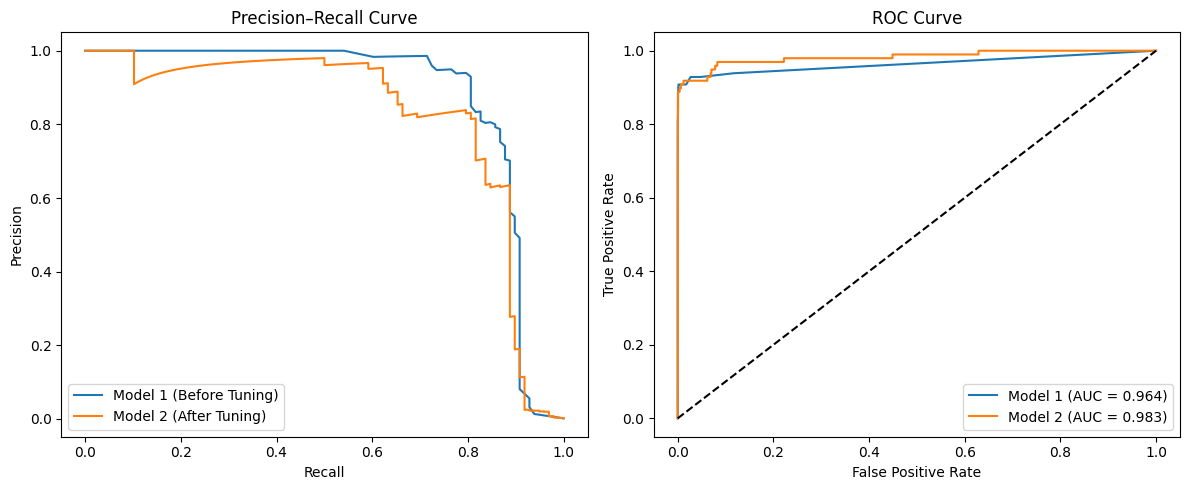

In [25]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

y_true = y_test
y_pred_prob_1 = model.predict_proba(x_test)[:, 1]
y_pred_prob_2 = MODEL.predict_proba(x_test)[:, 1]

# Precision–Recall Curve
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
prec1, rec1, _ = precision_recall_curve(y_true, y_pred_prob_1)
prec2, rec2, _ = precision_recall_curve(y_true, y_pred_prob_2)
plt.plot(rec1, prec1, label='Model 1 (Before Tuning)')
plt.plot(rec2, prec2, label='Model 2 (After Tuning)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()

# ROC Curve
plt.subplot(1,2,2)
fpr1, tpr1, _ = roc_curve(y_true, y_pred_prob_1)
fpr2, tpr2, _ = roc_curve(y_true, y_pred_prob_2)
plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {auc(fpr1,tpr1):.3f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {auc(fpr2,tpr2):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


### Visual Model Comparison — Before vs After Tuning

**Precision–Recall Curve (Left Plot)**  
- The tuned model (orange) achieves **higher recall** earlier but with lower precision compared to the original.  
- This aligns with the numeric results: **Recall ↑**, **Precision ↓**.  
- In fraud detection, this trade-off is acceptable since missing fraud is costlier than flagging legitimate transactions.

**ROC Curve (Right Plot)**  
- The tuned model (orange) has a higher **AUC**: `0.983` vs `0.964`.  
- This means it better distinguishes between fraudulent and legitimate transactions across all thresholds.  
- The orange line staying above the blue line shows improved overall classification performance.

**Interpretation**  
- **Before tuning**: More balanced precision and recall.  
- **After tuning**: Prioritizes catching more fraud (recall) at the expense of more false positives (precision drop).  
- Overall, the tuned model is better suited for real-world fraud detection tasks where recall is critical.


In [21]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 10.1 MB/s eta 0:00:06
   - -------------------------------------- 2.1/56.8 MB 5.3 MB/s eta 0:00:11
   -- ------------------------------------- 3.4/56.8 MB 5.8 MB/s eta 0:00:10
   -- ------------------------------------- 3.7/56.8 MB 4.7 MB/s eta 0:00:12
   --- ------------------------------------ 4.7/56.8 MB 4.3 MB/s eta 0:00:13
   ---- ----------------------------------- 6.0/56.8 MB 4.7 MB/s eta 0:00:11
   ----- ---------------------------------- 7.9/56.8 MB 5.2 MB/s eta 0:00:10
   ------ --------------------------------- 9.4/56.8 MB 5.5 MB/s eta 0:00:09
   ------- -------------------------------- 11.3/56.8 MB 5.8 MB/s eta 0:00:08
   -------- ------------------------------- 11.5/56.8 MB 5.5 MB/s eta 0:00:09
   -------- ------------------------------- 12.6/56.8 MB 5.4 MB/s eta 0:00:09
   --------- ------------------------------ 14.2/56.8 MB 5.5 MB/s eta 0:00:08
 


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# TRYING DIFFERENT TECHNIQUE- XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# create model instance
bst = XGBClassifier(n_estimators=200, max_depth=4, 
                    learning_rate=0.1, objective='binary:logistic', 
                    subsample=0.8, colsample_bytree=0.8,
                    random_state=42,use_label_encoder=False,
                    eval_metric='logloss')

bst.fit(x_train_res, y_train_res)

# Predictions
y_pred = bst.predict(x_test)
y_pred_prob = bst.predict_proba(x_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

C:\Users\Faiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:22:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56864
        True       0.48      0.88      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9806319123034696


### XGBoost Model Results — Fraud Detection

**Performance Metrics (Fraud Class)**
- **Recall:** 0.88 → The model successfully identifies ~88% of fraud cases, missing very few.
- **Precision:** 0.48 → Around half of the transactions flagged as fraud are actually fraud, indicating more false positives.
- **F1-Score:** 0.62 → Balanced measure that reflects the trade-off between high recall and moderate precision.

**Overall Metrics**
- **Accuracy:** ~100% — dominated by the large number of legitimate transactions.
- **ROC-AUC:** 0.981 → Excellent ability to separate fraud from legitimate transactions across all thresholds; higher than the tuned Random Forest (0.943).

**Interpretation**
- Compared to the tuned Random Forest, XGBoost achieves **similar recall** but with **much higher ROC-AUC**, meaning stronger class separation.
- The drop in precision is an expected trade-off for higher fraud capture — acceptable in fraud detection where false negatives are costlier than false positives.
- The model is well-suited for deployment scenarios prioritizing **maximum fraud detection** over perfect precision.


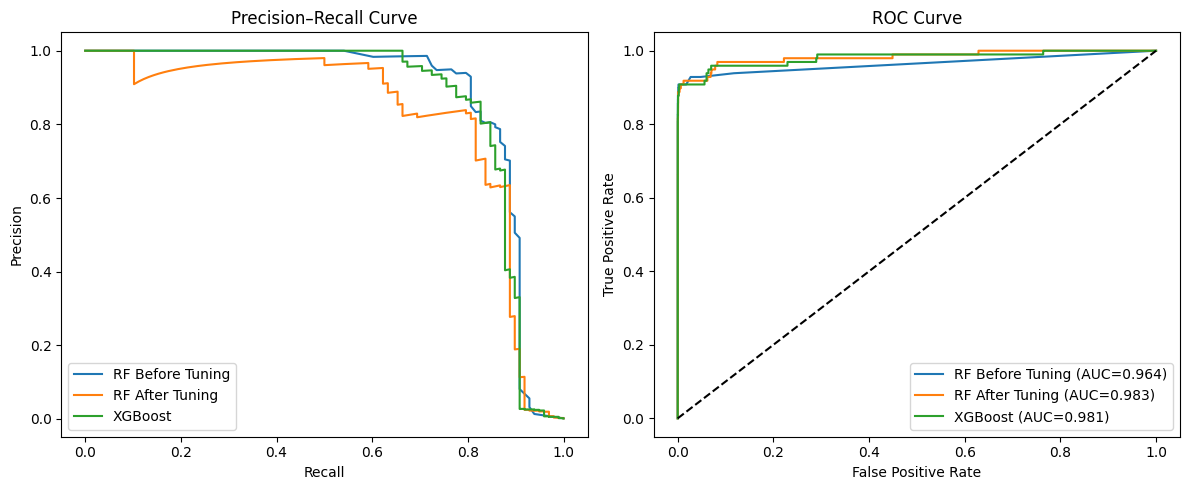

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Probabilities for fraud class from all three models
y_pred_prob_rf1 = model.predict_proba(x_test)[:, 1]
y_pred_prob_rf2 = MODEL.predict_proba(x_test)[:, 1]
y_pred_prob_xgb = bst.predict_proba(x_test)[:, 1]

plt.figure(figsize=(12,5))

# Precision–Recall Curve
plt.subplot(1,2,1)
prec1, rec1, _ = precision_recall_curve(y_test, y_pred_prob_rf1)
prec2, rec2, _ = precision_recall_curve(y_test, y_pred_prob_rf2)
prec3, rec3, _ = precision_recall_curve(y_test, y_pred_prob_xgb)
plt.plot(rec1, prec1, label='RF Before Tuning')
plt.plot(rec2, prec2, label='RF After Tuning')
plt.plot(rec3, prec3, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()

# ROC Curve
plt.subplot(1,2,2)
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob_rf1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob_rf2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr1, tpr1, label=f'RF Before Tuning (AUC={auc(fpr1,tpr1):.3f})')
plt.plot(fpr2, tpr2, label=f'RF After Tuning (AUC={auc(fpr2,tpr2):.3f})')
plt.plot(fpr3, tpr3, label=f'XGBoost (AUC={auc(fpr3,tpr3):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


## Model Comparison – RF (Before & After Tuning) vs XGBoost

### Key Insights:
1. **Precision–Recall Trade-off**  
   - XGBoost maintains **high recall** across a wide range but has a slightly lower precision than baseline RF at some thresholds.
   - Tuned RF sacrifices some precision compared to baseline RF for better recall.
   - Baseline RF has higher precision in certain recall ranges, but overall lower AUC.

2. **ROC-AUC**  
   - RF Before Tuning: **0.964**  
   - RF After Tuning: **0.983**  
   - XGBoost: **0.981**  
   → Both tuned RF and XGBoost outperform baseline RF, with tuned RF having the slight edge.

3. **Overall Conclusion**  
   - **Tuned RF** is marginally the best in ROC performance.  
   - **XGBoost** offers competitive ROC performance and strong recall, which may be preferable in fraud detection where catching positives is critical.  
   - Choice depends on whether the application prioritizes **fewer false positives (precision)** or **fewer missed frauds (recall)**.
   - **For Fewer false positives (high precision) → RF Before Tuning & for Fewer missed frauds (high recall) → Tuned RF or XGBoost**
